In [34]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [35]:
table = pd.read_csv('segment.dat')
table

,Region-centroid-col,Region-centroid-row,Region-pixel-count,Short-line-density-5,Short-line-density-2,Vedge-mean,Vegde-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturatoin-mean,Hue-mean,Class
0,218.0,178.0,9.0,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.777780,-25.222221,75.222220,0.318996,-2.040554,6
1,113.0,130.0,9.0,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.000000,-2.333333,2.555556,1.000000,-2.123254,3
2,32.0,173.0,9.0,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.888890,-15.777778,52.888890,0.266914,-1.998857,6
3,61.0,197.0,9.0,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.888890,-19.777779,61.555557,0.302925,-2.022274,6
4,149.0,185.0,9.0,0.000000,0.0,1.555555,1.068055,3.055555,1.925463,49.333332,45.333332,59.555557,43.111110,-12.000000,30.666666,-18.666666,59.555557,0.275889,-1.952770,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,13.0,83.0,9.0,0.000000,0.0,0.833333,0.547722,0.666667,0.632455,3.703704,1.555556,6.000000,3.555556,-6.444445,6.888889,-0.444444,6.000000,0.740476,-2.573381,3
2306,242.0,57.0,9.0,0.000000,0.0,1.222224,0.785183,1.000001,0.311111,92.925930,76.444440,119.333336,83.000000,-49.444443,79.222220,-29.777779,119.333336,0.359343,-2.254208,2
2307,163.0,151.0,9.0,0.000000,0.0,3.833333,11.055564,1.555556,2.251854,30.481482,23.111110,42.777780,25.555555,-22.111110,36.888890,-14.777778,42.777780,0.457448,-2.219625,4
2308,29.0,184.0,9.0,0.000000,0.0,1.611111,1.062840,2.666667,1.897366,13.629630,11.444445,11.333333,18.111110,-6.555555,-6.888889,13.444445,18.111110,0.387663,2.080445,7


In [36]:
def confidence_ellipse(x, y, ax, p_value, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y должны быть одинакового размера")
        
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Получение собственных значений
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                     width = ell_radius_x * 2,
                     height = ell_radius_y * 2,
                     facecolor = facecolor,
                     **kwargs)
    
    
    if p_value > 0 and p_value < 1:
        n_std = math.sqrt(-2 * math.log(p_value))
    else:
        print("P_vale должно быть в интервале от 0 до 1")
        
    # x
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Предективные эллипсы

## 90%

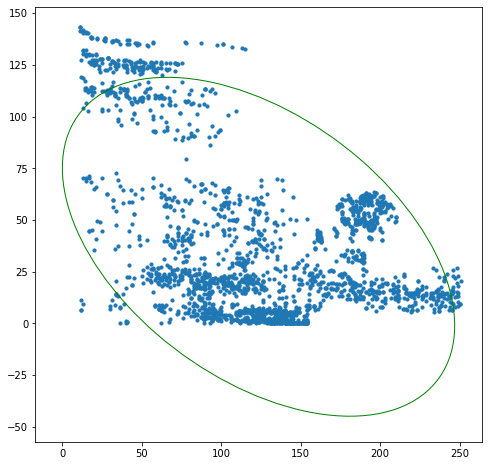

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Region-centroid-row'], table['Intensity-mean'], ax, 0.10, edgecolor='green')
ax.scatter(table['Region-centroid-row'], table['Intensity-mean'], s = 10)
plt.show()

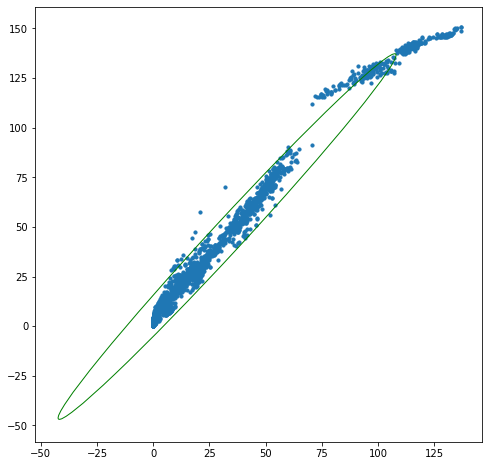

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawred-mean'], table['Value-mean'], ax, 0.10, edgecolor='green')
ax.scatter(table['Rawred-mean'], table['Value-mean'], s = 10)
plt.show()

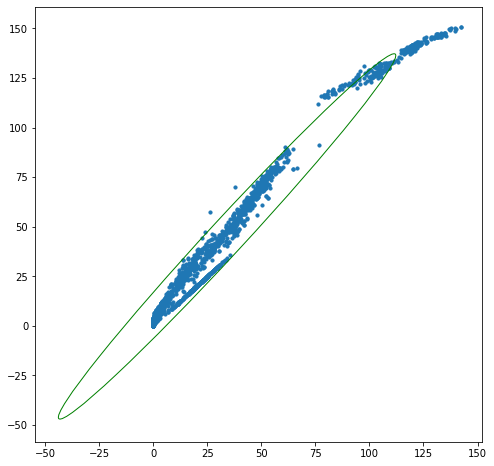

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawgreen-mean'], table['Value-mean'], ax, 0.10, edgecolor='green')
ax.scatter(table['Rawgreen-mean'], table['Value-mean'], s = 10)
plt.show()

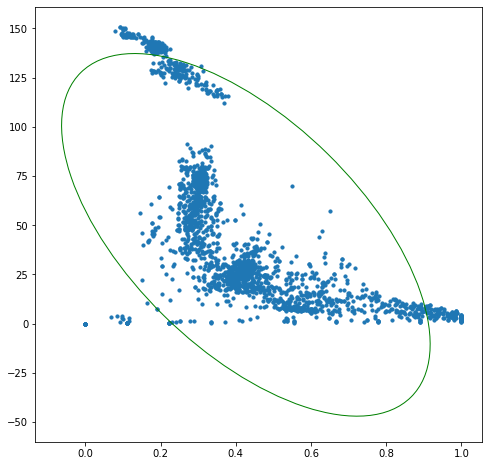

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Saturatoin-mean'], table['Value-mean'], ax, 0.10, edgecolor='green')
ax.scatter(table['Saturatoin-mean'], table['Value-mean'], s = 10)
plt.show()

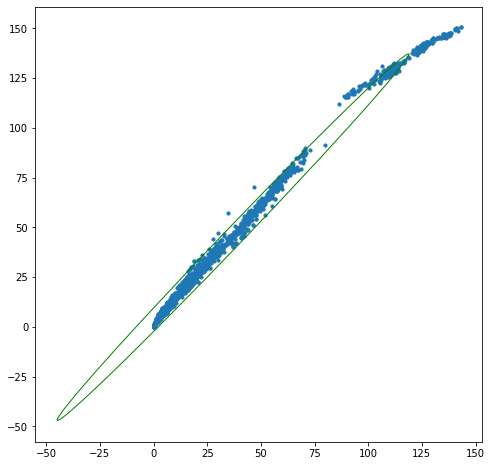

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Intensity-mean'], table['Value-mean'], ax, 0.10, edgecolor='green')
ax.scatter(table['Intensity-mean'], table['Value-mean'], s = 10)
plt.show()

## 95%

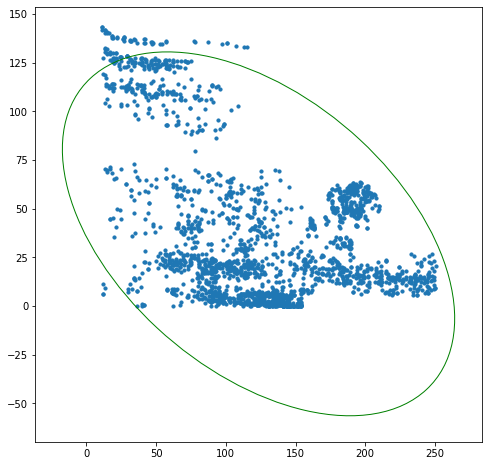

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Region-centroid-row'], table['Intensity-mean'], ax, 0.05, edgecolor='green')
ax.scatter(table['Region-centroid-row'], table['Intensity-mean'], s = 10)
plt.show()

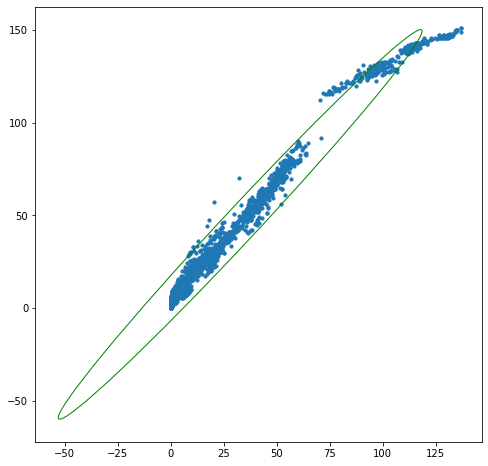

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawred-mean'], table['Value-mean'], ax, 0.05, edgecolor='green')
ax.scatter(table['Rawred-mean'], table['Value-mean'], s = 10)
plt.show()

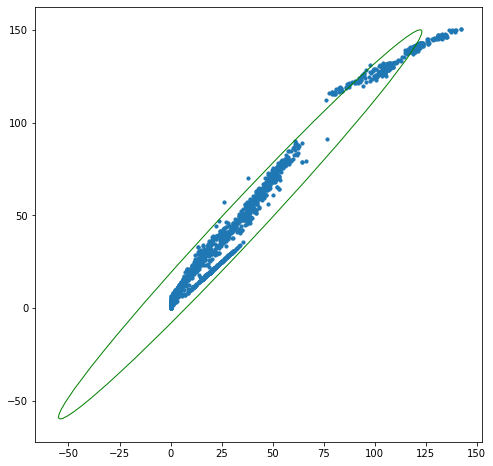

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawgreen-mean'], table['Value-mean'], ax, 0.05, edgecolor='green')
ax.scatter(table['Rawgreen-mean'], table['Value-mean'], s = 10)
plt.show()

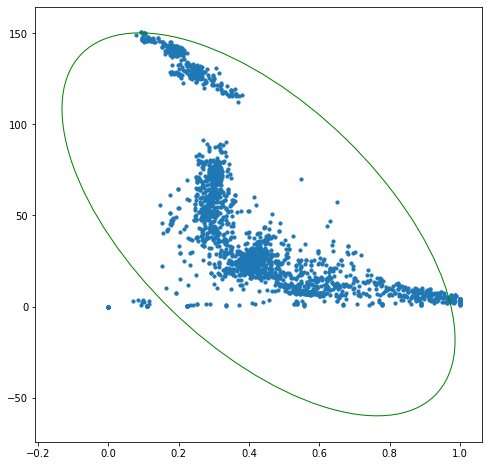

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Saturatoin-mean'], table['Value-mean'], ax, 0.05, edgecolor='green')
ax.scatter(table['Saturatoin-mean'], table['Value-mean'], s = 10)
plt.show()

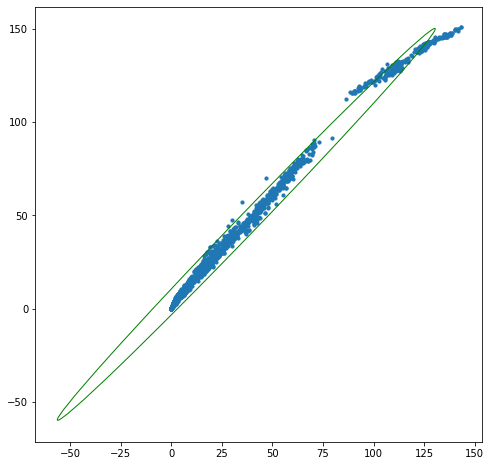

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Intensity-mean'], table['Value-mean'], ax, 0.05, edgecolor='green')
ax.scatter(table['Intensity-mean'], table['Value-mean'], s = 10)
plt.show()

## 99%

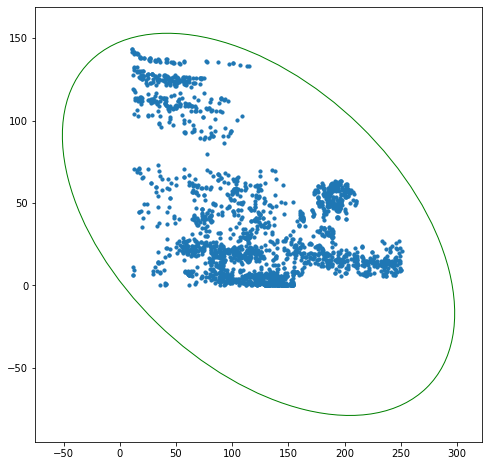

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Region-centroid-row'], table['Intensity-mean'], ax, 0.01, edgecolor='green')
ax.scatter(table['Region-centroid-row'], table['Intensity-mean'], s = 10)
plt.show()

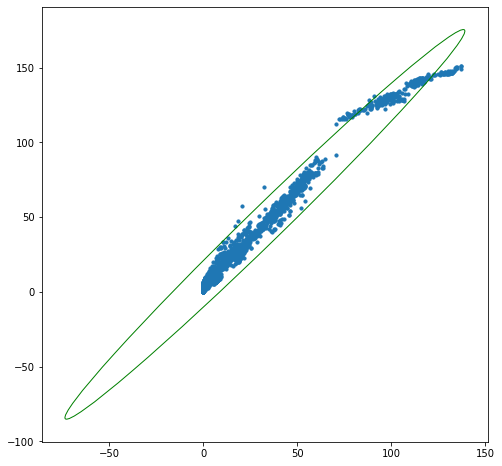

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawred-mean'], table['Value-mean'], ax, 0.01, edgecolor='green')
ax.scatter(table['Rawred-mean'], table['Value-mean'], s = 10)
plt.show()

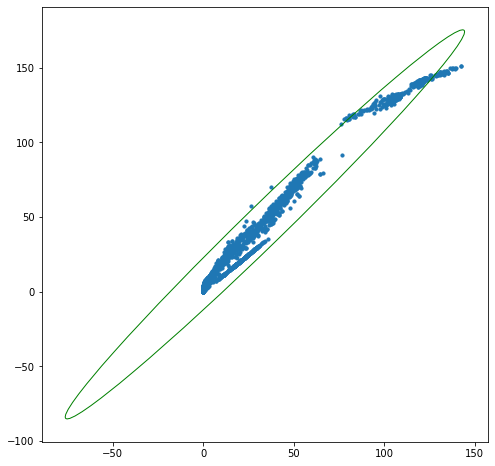

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Rawgreen-mean'], table['Value-mean'], ax, 0.01, edgecolor='green')
ax.scatter(table['Rawgreen-mean'], table['Value-mean'], s = 10)
plt.show()

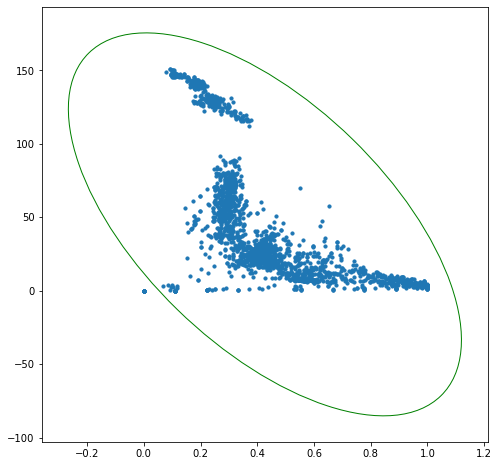

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Saturatoin-mean'], table['Value-mean'], ax, 0.01, edgecolor='green')
ax.scatter(table['Saturatoin-mean'], table['Value-mean'], s = 10)
plt.show()

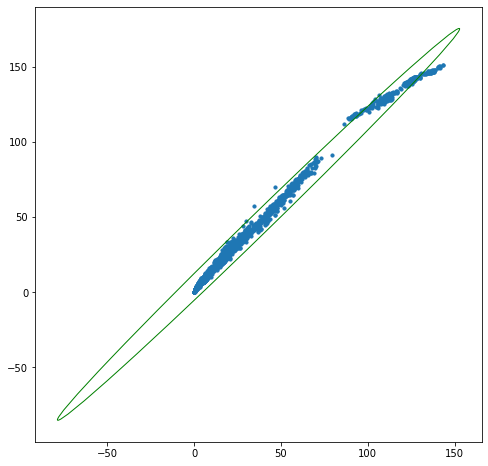

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))
confidence_ellipse(table['Intensity-mean'], table['Value-mean'], ax, 0.01, edgecolor='green')
ax.scatter(table['Intensity-mean'], table['Value-mean'], s = 10)
plt.show()

## Стандартизация

In [52]:
scaler_std = preprocessing.StandardScaler()
lst = list(table.columns)
lst.remove('Class')
for name in lst:
    x = scaler_std.fit_transform(table[[name]])
    table[name] = x[0:]
table

,Region-centroid-col,Region-centroid-row,Region-pixel-count,Short-line-density-5,Short-line-density-2,Vedge-mean,Vegde-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturatoin-mean,Hue-mean,Class
0,1.276189,0.949736,0.0,2.410668,-0.194552,-0.393061,-0.115120,-0.363952,-0.130944,0.591541,0.560194,0.713137,0.469694,-0.765448,1.296477,-1.429046,0.701072,-0.472692,-0.438613,6
1,-0.163336,0.114538,0.0,-0.357047,-0.194552,-0.598950,-0.121739,-0.579444,-0.133992,-0.947458,-0.936970,-0.956668,-0.936122,0.865568,-0.838573,0.552826,-0.992297,2.510764,-0.492140,3
2,-1.273827,0.862737,0.0,-0.357047,-0.194552,-0.063639,-0.087601,1.821758,-0.025412,0.171373,0.192247,0.199940,0.115184,0.050060,0.331162,-0.611283,0.180633,-0.700863,-0.411625,6
3,-0.876244,1.280336,0.0,-0.357047,-0.194552,-0.166583,-0.093539,0.051641,-0.107455,0.328572,0.325469,0.399091,0.243541,-0.295331,0.740001,-0.957630,0.382595,-0.543102,-0.426781,6
4,0.330215,1.071536,0.0,-0.357047,-0.194552,-0.125405,-0.103515,0.174779,-0.107455,0.321780,0.357188,0.353134,0.246597,0.059654,0.473120,-0.861422,0.335988,-0.661543,-0.381794,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,-1.534312,-0.703260,0.0,-0.357047,-0.194552,-0.393061,-0.115120,-0.487090,-0.129445,-0.873710,-0.892563,-0.877518,-0.841382,0.539365,-0.742042,0.716378,-0.912030,1.373798,-0.783484,3
2306,1.605223,-1.155658,0.0,-0.357047,-0.194552,-0.248938,-0.109824,-0.394736,-0.134911,1.463900,1.245337,1.726766,1.343745,-3.173596,2.954548,-1.823496,1.729005,-0.295935,-0.576900,2
2307,0.522152,0.479938,0.0,-0.357047,-0.194552,0.718740,0.119238,-0.240813,-0.101904,-0.172136,-0.277203,-0.032403,-0.236270,-0.813419,0.791106,-0.524697,-0.054988,0.133859,-0.554517,4
2308,-1.314956,1.054136,0.0,-0.357047,-0.194552,-0.104816,-0.103631,0.067033,-0.107933,-0.613652,-0.610259,-0.754964,-0.441030,0.529771,-1.446154,1.918970,-0.629802,-0.171864,2.228699,7


In [53]:
del table['Region-pixel-count']
del table['Class']
table

,Region-centroid-col,Region-centroid-row,Short-line-density-5,Short-line-density-2,Vedge-mean,Vegde-sd,Hedge-mean,Hedge-sd,Intensity-mean,Rawred-mean,Rawblue-mean,Rawgreen-mean,Exred-mean,Exblue-mean,Exgreen-mean,Value-mean,Saturatoin-mean,Hue-mean
0,1.276189,0.949736,2.410668,-0.194552,-0.393061,-0.115120,-0.363952,-0.130944,0.591541,0.560194,0.713137,0.469694,-0.765448,1.296477,-1.429046,0.701072,-0.472692,-0.438613
1,-0.163336,0.114538,-0.357047,-0.194552,-0.598950,-0.121739,-0.579444,-0.133992,-0.947458,-0.936970,-0.956668,-0.936122,0.865568,-0.838573,0.552826,-0.992297,2.510764,-0.492140
2,-1.273827,0.862737,-0.357047,-0.194552,-0.063639,-0.087601,1.821758,-0.025412,0.171373,0.192247,0.199940,0.115184,0.050060,0.331162,-0.611283,0.180633,-0.700863,-0.411625
3,-0.876244,1.280336,-0.357047,-0.194552,-0.166583,-0.093539,0.051641,-0.107455,0.328572,0.325469,0.399091,0.243541,-0.295331,0.740001,-0.957630,0.382595,-0.543102,-0.426781
4,0.330215,1.071536,-0.357047,-0.194552,-0.125405,-0.103515,0.174779,-0.107455,0.321780,0.357188,0.353134,0.246597,0.059654,0.473120,-0.861422,0.335988,-0.661543,-0.381794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,-1.534312,-0.703260,-0.357047,-0.194552,-0.393061,-0.115120,-0.487090,-0.129445,-0.873710,-0.892563,-0.877518,-0.841382,0.539365,-0.742042,0.716378,-0.912030,1.373798,-0.783484
2306,1.605223,-1.155658,-0.357047,-0.194552,-0.248938,-0.109824,-0.394736,-0.134911,1.463900,1.245337,1.726766,1.343745,-3.173596,2.954548,-1.823496,1.729005,-0.295935,-0.576900
2307,0.522152,0.479938,-0.357047,-0.194552,0.718740,0.119238,-0.240813,-0.101904,-0.172136,-0.277203,-0.032403,-0.236270,-0.813419,0.791106,-0.524697,-0.054988,0.133859,-0.554517
2308,-1.314956,1.054136,-0.357047,-0.194552,-0.104816,-0.103631,0.067033,-0.107933,-0.613652,-0.610259,-0.754964,-0.441030,0.529771,-1.446154,1.918970,-0.629802,-0.171864,2.228699


In [67]:
pca = PCA(n_components = 18)
table_train = pca.fit_transform(table)

cov = pca.get_covariance()
print("Матрица ковариации \n",cov)

# [en, ev] = np.linalg.eig(cov)
# print("Собственные числа\n",en)
# print("Матрица преобразования (может понадобится переставить столбцы)\n",ev)


comp = pca.components_
print("Матрица преобразования \n", comp.T)

explained_variance=pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Собственные числа \n",explained_variance)
print("Оценка информативности \n", explained_variance_ratio)

Матрица ковариации 
 [[ 1.00043309e+00  2.67799187e-02 -5.19842333e-02 -1.59711979e-02
  -1.13090916e-02  2.19698591e-02 -1.89224081e-02 -1.93962996e-03
   5.89829148e-02  5.46967057e-02  5.81942873e-02  6.34081256e-02
  -8.68540585e-02  4.31171453e-02  1.40411707e-02  6.02153763e-02
  -1.08261103e-01  3.93155694e-02]
 [ 2.67799187e-02  1.00043309e+00  6.49194150e-02  4.18875258e-02
   2.61576208e-02 -5.36012035e-02  1.05268084e-01 -2.10864937e-02
  -4.65441891e-01 -4.68211863e-01 -4.81729041e-01 -4.38161027e-01
   3.53328398e-01 -4.90430867e-01  4.76627435e-01 -4.58586293e-01
   8.15916680e-02  5.93186663e-01]
 [-5.19842333e-02  6.49194150e-02  1.00043309e+00 -9.02825551e-03
  -2.02144998e-02 -3.27955844e-02 -2.12955569e-02 -3.80125710e-02
  -1.82184520e-02 -1.67625596e-02 -2.14014146e-02 -1.56109848e-02
   2.80248148e-02 -3.61797048e-02  3.31966578e-02 -1.58927977e-02
  -4.32393849e-02  1.13038108e-01]
 [-1.59711979e-02  4.18875258e-02 -9.02825551e-03  1.00043309e+00
   2.62689153e-0

In [68]:
table_train

array([[ 2.04123496e+00, -5.94966451e-01,  3.21693355e-01, ...,
         8.74551294e-09, -3.64126169e-08, -5.93580418e-08],
       [-2.86023840e+00, -5.21253442e-01, -1.62177500e+00, ...,
         1.86240047e-09, -1.39451540e-09, -2.50196874e-09],
       [ 6.19484103e-01,  7.90366943e-01,  4.00348607e-02, ...,
         1.33897332e-08,  2.81198937e-08,  1.33675442e-10],
       ...,
       [ 3.72180242e-01,  3.21011930e-01, -5.78767373e-01, ...,
        -6.66918756e-08,  2.34301003e-10, -1.78539803e-08],
       [-2.78356659e+00, -2.58603108e-01,  2.20711901e+00, ...,
        -4.03267315e-10, -3.63843984e-08, -1.24033356e-08],
       [-2.51370218e+00, -5.36093765e-01, -1.13405119e+00, ...,
         3.23941752e-09, -2.13579768e-09, -8.78658311e-10]])

## Определение главных компонент

In [69]:
total_ratio = 0
counter = 0
for each in explained_variance_ratio:
    total_ratio += each
    counter +=1
    if total_ratio>= 0.95:
        print(f"Достаточно {counter} компонент, чтобы обеспечить информативность {total_ratio}%")
        break

Достаточно 10 компонент, чтобы обеспечить информативность 0.9696627529361848%


In [70]:
pca = PCA(n_components = 10)
table_train = pca.fit_transform(table)

cov = pca.get_covariance()
print("Матрица ковариации \n",cov)
# [en, ev] = np.linalg.eig(cov)
# print("Матрица преобразования \n",ev)

comp = pca.components_
print("Матрица преобразования \n", comp.T)

explained_variance=pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Собственные числа \n",explained_variance)
print("Оценка информативности \n", explained_variance_ratio)

Матрица ковариации 
 [[ 9.99879805e-01  2.34579709e-02 -5.21762924e-02 -1.58259116e-02
  -1.27584739e-02  2.22537991e-02 -1.88440918e-02 -1.66743896e-03
   5.67849488e-02  5.16635639e-02  5.67278108e-02  6.11634296e-02
  -9.26452957e-02  4.61948031e-02  1.46339693e-02  5.88675271e-02
  -1.11531993e-01  4.15287889e-02]
 [ 2.34579709e-02  9.74883283e-01  6.29800514e-02  4.28754373e-02
   1.87926619e-02 -5.56734376e-02  1.04889441e-01 -1.53250827e-02
  -4.79947332e-01 -4.87936153e-01 -4.90927399e-01 -4.53831147e-01
   3.17766836e-01 -4.66919839e-01  4.72452782e-01 -4.67490089e-01
   6.37834536e-02  6.19780800e-01]
 [-5.21762924e-02  6.29800514e-02  1.00025565e+00 -8.96008702e-03
  -2.06061116e-02 -3.31030006e-02 -2.12898650e-02 -3.74783012e-02
  -1.91601329e-02 -1.80203547e-02 -2.19622662e-02 -1.66935839e-02
   2.59220716e-02 -3.44112095e-02  3.23088684e-02 -1.64663602e-02
  -4.41014583e-02  1.15678867e-01]
 [-1.58259116e-02  4.28754373e-02 -8.96008702e-03  1.00038770e+00
   2.63285477e-0

In [71]:
table_train 

array([[ 2.04123496, -0.59496645,  0.32169336, ...,  0.47878675,
        -0.61860667,  1.04756414],
       [-2.8602384 , -0.52125344, -1.621775  , ...,  0.51620698,
        -0.89730873,  0.12688003],
       [ 0.6194841 ,  0.79036694,  0.04003486, ..., -0.46596777,
        -0.67363155, -0.25236338],
       ...,
       [ 0.37218024,  0.32101193, -0.57876737, ...,  1.1498231 ,
        -0.07824448,  0.2754947 ],
       [-2.78356659, -0.25860311,  2.20711901, ...,  0.03965675,
         0.13213906, -0.19595182],
       [-2.51370218, -0.53609376, -1.13405119, ...,  0.04909719,
        -0.25750373,  0.51527379]])

## Определение главных компонент по методу Кайзера

In [72]:
counter = 0
for each in explained_variance:
    counter +=1
    if each < 1:
        print(f"По критерию Кайзера достаточно {counter-1} компонент")
        break

По критерию Кайзера достаточно 4 компонент


In [73]:
pca = PCA(n_components = 4)
table_train = pca.fit_transform(table)

cov = pca.get_covariance()
print("Матрица ковариации \n",cov)
# [en, ev] = np.linalg.eig(cov)
# print("Матрица преобразования \n",ev)

comp = pca.components_
print("Матрица преобразования \n", comp.T)

explained_variance=pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Собственные числа \n",explained_variance)
print("Оценка информативности \n", explained_variance_ratio)

Матрица ковариации 
 [[ 6.95159267e-01  2.37131275e-02 -3.25293469e-01 -7.48559234e-02
  -1.33838101e-02  3.10924830e-02 -1.53285088e-02  1.70383191e-02
   8.37545873e-02  8.19685042e-02  7.41759656e-02  9.60199862e-02
  -8.43102011e-02  4.78882060e-03  7.64296134e-02  7.98124470e-02
  -9.83324431e-02  8.68991410e-02]
 [ 2.37131275e-02  8.26516259e-01  1.07249721e-01 -1.22225970e-02
   9.12244268e-03  3.02710972e-02  3.77667876e-02  3.79885309e-02
  -4.39774125e-01 -4.35508643e-01 -4.72570526e-01 -3.99792924e-01
   3.96297591e-01 -5.79526765e-01  5.84493828e-01 -4.50754975e-01
   1.10822845e-01  5.81076258e-01]
 [-3.25293469e-01  1.07249721e-01  7.27390347e-01  3.63786629e-02
  -2.73481313e-02 -7.06935978e-02  2.95680206e-04 -4.90785350e-02
  -9.28884910e-04  1.62205817e-03 -9.67228358e-03  7.08910923e-03
   2.39027948e-02 -5.90974947e-02  7.61594765e-02 -2.19258003e-03
  -6.12048962e-02  1.43576900e-01]
 [-7.48559234e-02 -1.22225970e-02  3.63786629e-02  5.14714335e-01
   3.12288052e-0

In [74]:
table_train

array([[ 2.04123496, -0.59496645,  0.32169336,  0.97919988],
       [-2.8602384 , -0.52125344, -1.621775  , -0.33460454],
       [ 0.6194841 ,  0.79036694,  0.04003486,  0.77749278],
       ...,
       [ 0.37218024,  0.32101193, -0.57876737, -0.60879979],
       [-2.78356659, -0.25860311,  2.20711901,  0.54974126],
       [-2.51370218, -0.53609376, -1.13405119,  0.62307526]])

# END

In [75]:
# comp = pca.components_
# explained_variance = pca.explained_variance_
# print(explained_variance)
# print(comp)
# print(comp.T)

# print(en)
# en_r = en / en.sum()
# print(en_r)

# explained_variance=pca.explained_variance_
# explained_variance_ratio = pca.explained_variance_ratio_
# print(explained_variance)
# print(explained_variance_ratio)

# import numpy as np
# np.dot(test.to_numpy(), comp.T)

In [63]:
test = table[['Rawred-mean', 'Rawblue-mean', 'Rawgreen-mean']].head(4)
test

,Rawred-mean,Rawblue-mean,Rawgreen-mean
0,0.560194,0.713137,0.469694
1,-0.936970,-0.956668,-0.936122
2,0.192247,0.199940,0.115184
3,0.325469,0.399091,0.243541


In [64]:
pca = PCA(n_components = 3)
table_train = pca.fit_transform(test)

cov = pca.get_covariance()
print("Матрица ковариации \n",cov)
[en, ev] = np.linalg.eig(cov)
print("Матрица преобразования (некорректная) \n",ev)

comp = pca.components_
print("Матрица преобразования \n",comp.T)

explained_variance=pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Собственные числа \n",explained_variance)
print("Оценка информативности \n", explained_variance_ratio)

Матрица ковариации 
 [[0.44321773 0.4838895  0.41514724]
 [0.4838895  0.53047796 0.45343721]
 [0.41514724 0.45343721 0.3888721 ]]
Матрица преобразования (некорректная) 
 [[-0.57038315 -0.64159724  0.5128509 ]
 [-0.62380138 -0.06782683 -0.77863429]
 [-0.53435466  0.76403698  0.36154196]]
Матрица преобразования 
 [[-0.57038315  0.5128509   0.64159724]
 [-0.62380138 -0.77863429  0.06782683]
 [-0.53435466  0.36154196 -0.76403698]]
Собственные числа 
 [1.36134933e+00 1.21827445e-03 1.80846694e-07]
Оценка информативности 
 [9.99105765e-01 8.94101905e-04 1.32724916e-07]


In [65]:
table_train

array([[-9.54214405e-01, -3.72973677e-02, -2.81862904e-04],
       [ 1.69257404e+00, -1.32128239e-02, -2.04489542e-05],
       [-2.34776525e-01,  4.54232797e-02, -3.05450574e-04],
       [-5.03583115e-01,  5.08691201e-03,  6.07762432e-04]])

In [66]:
np.dot(test.to_numpy(), comp.T)

array([[-1.01536441, -0.09816323,  0.04892499],
       [ 1.63142404, -0.07407868,  0.0491864 ],
       [-0.29592653, -0.01544258,  0.0489014 ],
       [-0.56473312, -0.05577895,  0.04981461]])